In [1]:
import time
start_time = time.time()

# Preparation - Data grouped on forum level

Import the packages and load the data

In [2]:
# Import needed packages
import os
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import KBinsDiscretizer
import seaborn as sns; sns.set()
import glob
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import re
import nltk
from langdetect import detect
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
from lime import lime_text
import gensim
import gensim.downloader as gensim_api
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K
import transformers
plt.style.use('seaborn-whitegrid')
sns.set_style("whitegrid")
from bs4 import BeautifulSoup
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import EnglishStemmer
import spacy
from spacy import displacy
from wordcloud import WordCloud
from sklearn.preprocessing import KBinsDiscretizer
from nbpep8.nbpep8 import pep8
from sklearn.metrics.pairwise import cosine_similarity
from linearmodels import PanelOLS


In [3]:
#Set the working directory
os.chdir('C:\\Users\\piotr\\OneDrive - Erasmus University Rotterdam\\Thesis\\')

In [4]:
# #Load the merged_df from the directory 'C:\\Users\\piotr\\OneDrive - Erasmus University Rotterdam\\Thesis\\Master Thesis Data\\' (containing the readability results)):
merged_df = pd.read_csv('Master Thesis Data\\df_clean_final.csv')

# Add the FIX

In [5]:
df_MAT = pd.read_csv('Master Thesis Data\\FIX\\merged_df_after_notebook5_FIX.csv')
#Drop answer body from df_MAT
df_MAT = df_MAT.drop(['Answer_Body'], axis=1)
#Concat the dfs
df = pd.concat([merged_df, df_MAT], ignore_index=True)
# show forum counts in df
print(df['Forum'].value_counts())

Stack Overflow                  2451718
Mathematics                      165729
Stack Overflow in Russian         73932
Stack Overflow in Spanish         41099
Ask Ubuntu                        37819
Super User                        36193
MathOverflow                      34322
Physics                           32556
Statistical Analysis              29399
Unix and Linux                    27819
TeX - LaTeX                       27798
Electrical Engineering            26176
Blender                           23378
GIS                               19150
Server Fault                      19065
Salesforce                        15999
Ethereum                          15056
English Language Learners         14325
Home Improvement                  12089
Ask Different                     11956
Mathematica                       10485
Database Administrators           10019
English                            7245
Magento                            7200
WordPress                          7126


In [6]:
print(df.shape)

(3206459, 30)


In [7]:
merged_df.backup = df.copy()

C:\Users\piotr\AppData\Local\Temp\ipykernel_5020\1587128445.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  merged_df.backup = df.copy()


In [8]:
merged_df = df.copy()

In [9]:
merged_df.shape

(3206459, 30)

In [11]:
#Drop Week_of_Year = 17 and 26
merged_df = merged_df[merged_df['Week_of_Year'] != 17]
merged_df = merged_df[merged_df['Week_of_Year'] != 26]

In [12]:
merged_df.head()

,Post_Creation_Date,Post_View_Count,Post_Title,Post_Score,Post_Answer_Count,Response_Scores,Post_Author,Answer_Author,Forum,Week_of_Year,...,Post_Body,Post_Body_EN,ari,fre,fk_grade,gunning_fog,smog_index,coleman_liau_index,lix,rix
14514,2021-07-05 00:00:24,126,Scraping nested html with Selenium,1,1,0,16379541,7326738,Stack Overflow,27,...,<p>I'm looking for some help with scraping wit...,I'm looking for some help with scraping with s...,9.5,65.32,7.7,8.53,10.5,9.62,38.557692,3.625000
14515,2021-07-05 00:00:29,138,You should use prepared statements for accurat...,0,1,1,16379618,4269535,Stack Overflow,27,...,<p>Why I get this error message ?</p>\n<pre><c...,Why I get this error message ?\n \nQuery:\n \n \n,2.3,89.75,2.5,2.80,0.0,3.26,NaN,NaN
14516,2021-07-05 00:00:38,66,I try to Run this Mobilenet script,-1,1,0,7118337,0,Stack Overflow,27,...,"<p>I am try to run this python code\n<a href=""...",I am try to run this python code\nhttps://gith...,19.5,25.46,12.7,9.80,0.0,20.52,14.333333,0.500000
14517,2021-07-05 00:01:07,58,Strange referenceError only occurs on first lo...,-3,2,2,8900748,0,Stack Overflow,27,...,<p>I'm getting a referenceError which I've bee...,I'm getting a referenceError which I've been u...,10.5,72.80,9.0,10.61,8.5,6.85,42.112130,4.333333
14518,2021-07-05 00:01:49,1480,Meaning of tilde and dot notation in dplyr,3,2,12,16379550,0,Stack Overflow,27,...,<p><strong>Summary</strong>\nI was reading an ...,Summary\nI was reading an article on the subje...,5.8,68.87,6.4,7.59,9.8,7.29,39.518305,3.615385


In [13]:
merged_df.shape

(3107968, 30)

In [11]:
#Load the results of the content novelty calculation, that were saved as follows:
final_result_df_tfidf = pd.read_csv('Master Thesis Data\\final_result_df_tfidf.csv')
final_result_df_lsi = pd.read_csv('Master Thesis Data\\final_result_df_lsi.csv')
final_result_df_doc2vec = pd.read_csv('Master Thesis Data\\final_result_df_doc2vec.csv')

Load the grouped data frames

In [14]:
#Read the grouped dfs, exclude loading 'rix' and 'lix' columns
grouped_df = pd.read_csv('Master Thesis Data\\grouped_df.csv')
grouped_df_tag = pd.read_csv('Master Thesis Data\\grouped_df_tag.csv')
grouped_df_week = pd.read_csv('Master Thesis Data\\grouped_df_week.csv')
grouped_df_week_tag = pd.read_csv('Master Thesis Data\\grouped_df_week_tag.csv')

Drop rix and lix

In [15]:
#Drop rix and lix
merged_df = merged_df.drop(['rix', 'lix'], axis=1)
grouped_df = grouped_df.drop(['rix', 'lix'], axis=1)
grouped_df_tag = grouped_df_tag.drop(['rix', 'lix'], axis=1)
grouped_df_week = grouped_df_week.drop(['rix', 'lix'], axis=1)
grouped_df_week_tag = grouped_df_week_tag.drop(['rix', 'lix'], axis=1)


Drop weeks 17 and 26 for dfs with weekly aggregation

In [16]:
# Drop weeks 17 and 26
grouped_df_week = grouped_df_week[grouped_df_week['Week_of_Year'] != 17]
grouped_df_week = grouped_df_week[grouped_df_week['Week_of_Year'] != 26]
grouped_df_week_tag = grouped_df_week_tag[grouped_df_week_tag['Week_of_Year'] != 17]
grouped_df_week_tag = grouped_df_week_tag[grouped_df_week_tag['Week_of_Year'] != 26]

Drop text fields

In [17]:
# merged_df drop Post Body, Post Body CLean, Post Body EN and Post title
merged_df = merged_df.drop(['Post_Body', 'Post_Body_clean', 'Post_Body_EN', 'Post_Title'], axis=1)

# 7. Preparation for estimation

Assume that we have grouped_df (grouped by month). Month indicator is 'Month_of_Year'.
Dependent variables are:
1.Post_Count by forum
2.Post_Answer_Count by forum
3.Avg_readability_index by forum
4.avg_cos_sim by tag

For the DV 1-3 it is possible to test the PTA assumption by adding time dummies to regression. 
The content novelty has got only two periods per group, so it cannot be tested that way.


## Preparation - part 2

#### Needed transformations for merged_df, grouped_df and grouped_df_tag 

In [18]:
merged_df['Post_Creation_Date'] = pd.to_datetime(merged_df['Post_Creation_Date'])
merged_df['Month_of_Year'] = merged_df['Post_Creation_Date'].dt.month

In [19]:
#Add the variable 'Month counter' to the merged_df, taking value -4 for 07 -3 for 08 -2 for 09 -1 for 10 0 for 11 1 for 12 2 for 01 3 for 02 4 for 03 5 for 04 #use map
merged_df['Month_Counter'] = merged_df['Month_of_Year'].map({7:-4, 8:-3, 9:-2, 10:-1, 11:0, 12:1, 1:2, 2:3, 3:4, 4:5})

In [20]:
#display all cols
pd.set_option('display.max_columns', None)

In [21]:
merged_df_2 = merged_df.copy()

In [19]:
grouped_df_2 = grouped_df.copy()
grouped_df_tag_2 = grouped_df_tag.copy()
grouped_df_week_2 = grouped_df_week.copy()
grouped_df_week_tag_2 = grouped_df_week_tag.copy()

In [22]:
merged_df_2.shape

(3107968, 26)

In [23]:
#Show the number of unique tag 1, tag 2, tag 3 and tag_combinations
print('Number of unique tag 1: ', len(merged_df_2['tag_1'].unique()))
print('Number of unique tag 2: ', len(merged_df_2['tag_2'].unique()))
print('Number of unique tag 3: ', len(merged_df_2['tag_3'].unique()))
print('Number of unique tag combinations: ', len(merged_df_2['tag_combined'].unique()))

Number of unique tag 1:  24140
Number of unique tag 2:  44621
Number of unique tag 3:  53293
Number of unique tag combinations:  342992


# Find a better tag cutoff

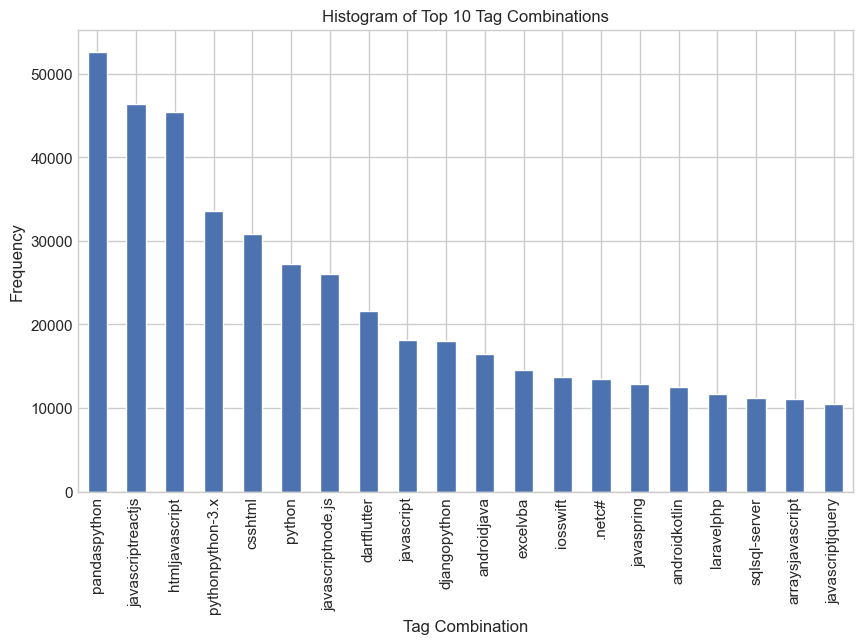

In [24]:
import matplotlib.pyplot as plt

# Count the occurrence of each tag combination
tag_counts = merged_df_2['tag_combined'].value_counts()

# Take the top 50 most common tag combinations
top_50_tags = tag_counts[:20]

# Plot histogram
plt.figure(figsize=(10,6))
top_50_tags.plot(kind='bar')
plt.title('Histogram of Top 10 Tag Combinations')
plt.xlabel('Tag Combination')
plt.ylabel('Frequency')
plt.show()

In [25]:
# Count the occurrence of each tag combination
tag_counts = merged_df_2['tag_combined'].value_counts()

# Calculate the number of combinations that make up the top 10%
top_10_percent = int(0.10 * len(tag_counts))

# Get the top 10% most common tag combinations
top_10_tags = tag_counts[:top_10_percent]

# Sum the values to get the number of observations in these tag combinations
num_observations = top_10_tags.sum()

print('Number of observations in the top 10% of most popular tag combinations: ', num_observations)

# Calculate the average number of observations per tag combination in the top 10%
avg_observations_top_10 = num_observations / top_10_percent

print('Average number of observations per tag combination in the top 10%: ', avg_observations_top_10)


Number of observations in the top 10% of most popular tag combinations:  2593153
Average number of observations per tag combination in the top 10%:  75.60433248782763


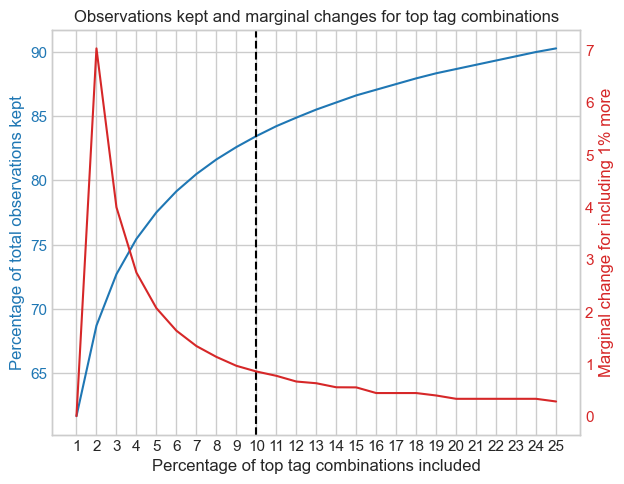

In [26]:
# Adjust the percentages range to 1 to 25
percentages = list(range(1, 26))

observations_kept = []

for percentage in percentages:
    current_percent = int(percentage * 0.01 * len(tag_counts))
    current_top_tags = tag_counts[:current_percent]
    current_num_observations = current_top_tags.sum()
    observations_kept.append(current_num_observations)

observations_kept_percent = [num / len(merged_df_2) * 100 for num in observations_kept]
observations_kept_percent = np.array(observations_kept_percent)
marginal_changes = np.diff(observations_kept_percent)
marginal_changes = np.concatenate(([0], marginal_changes))

# Plot the data
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Percentage of top tag combinations included')
ax1.set_ylabel('Percentage of total observations kept', color=color)
ax1.plot(percentages, observations_kept_percent, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)  # Add gridlines only for the blue line

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Marginal change for including 1% more', color=color)
ax2.plot(percentages, marginal_changes, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(False)  # Remove gridlines for the red line

# Add a black dashed line at 10%
ax1.axvline(10, color='black', linestyle='dashed')

# Adjust the x-axis to show each number from 1 to 25
plt.xticks(range(1, 26))

fig.tight_layout()
plt.title('Observations kept and marginal changes for top tag combinations')
plt.show()


#### EDA before reduction

In [27]:
#Show the number of unique tag 1, tag 2, tag 3 and tag_combinations
print('Number of unique tag 1: ', len(merged_df_2['tag_1'].unique()))
print('Number of unique tag 2: ', len(merged_df_2['tag_2'].unique()))
print('Number of unique tag 3: ', len(merged_df_2['tag_3'].unique()))
print('Number of unique tag combinations: ', len(merged_df_2['tag_combined'].unique()))
print('Number of unique forums: ', len(merged_df_2['Forum'].unique()))

Number of unique tag 1:  24140
Number of unique tag 2:  44621
Number of unique tag 3:  53293
Number of unique tag combinations:  342992
Number of unique forums:  36


In [28]:
# print names of all Forums
print('Names of all Forums: ', merged_df_2['Forum'].unique()) 

Names of all Forums:  ['Stack Overflow' 'MathOverflow' 'Super User' 'Stack Overflow in Russian'
 'Ask Ubuntu' 'Server Fault' 'TeX - LaTeX' 'Unix and Linux' 'Physics'
 'Statistical Analysis' 'Stack Overflow in Spanish'
 'Electrical Engineering' 'GIS' 'Stack Overflow in Portuguese'
 'Salesforce' 'English' 'Ask Different' 'WordPress' 'Magento' 'Blender'
 'English Language Learners' 'SharePoint' 'Database Administrators'
 'Arqade' 'Meta Stack Exchange' 'Mathematica' 'Drupal Answers'
 'Code Review' 'Home Improvement' 'Science Fiction and Fantasy'
 'IT Security' 'Software Engineering' 'Android Enthusiasts'
 'Game Development' 'Ethereum' 'Mathematics']


In [29]:
#Counts of observations per forum
print('Counts of observations per forum: ', merged_df_2['Forum'].value_counts())

Counts of observations per forum:  Stack Overflow                  2377476
Mathematics                      160185
Stack Overflow in Russian         71733
Stack Overflow in Spanish         39813
Ask Ubuntu                        36361
Super User                        35043
MathOverflow                      33192
Physics                           31446
Statistical Analysis              28514
Unix and Linux                    26914
TeX - LaTeX                       26909
Electrical Engineering            25294
Blender                           22618
GIS                               18565
Server Fault                      18473
Salesforce                        15468
Ethereum                          14630
English Language Learners         13912
Home Improvement                  11738
Ask Different                     11622
Mathematica                       10134
Database Administrators            9720
English                            7031
Magento                            6999
WordP

In [30]:
# Calculate the total number of tag combinations
total_combinations = len(tag_counts)

# Calculate the total number of observations
total_observations = tag_counts.sum()

# Calculate the average number of observations per tag combination in the whole dataset
avg_observations_total = total_observations / total_combinations

print('Average number of observations per tag combination in the whole dataset: ', avg_observations_total)


Average number of observations per tag combination in the whole dataset:  9.061339801919


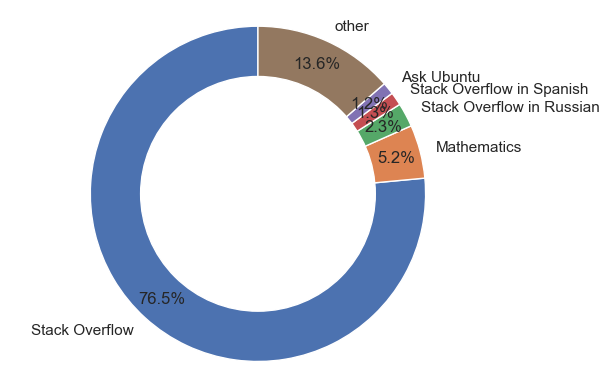

In [49]:
import matplotlib.pyplot as plt

# Calculate the count of observations per each 'Forum'
forum_counts = merged_df_2['Forum'].value_counts()

# Get the top 10 forums
top_10_forums = forum_counts[:5]

# Group the rest under 'other'
other_count = forum_counts[5:].sum()
top_10_forums['other'] = other_count

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(top_10_forums, labels=top_10_forums.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, labeldistance=1.1)

# Draw a white circle at the center (to make it a donut chart)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  

plt.title('')
plt.show()


Now lets create merged_df_NEW which containts only reduced tags

In [34]:
# Create a copy of merged_df_2
merged_df_NEW = merged_df_2.copy()

# Count the occurrence of each tag combination
tag_counts = merged_df_NEW['tag_combined'].value_counts()

# Calculate the number of combinations that make up the top 10%
top_10_percent = int(0.10 * len(tag_counts))

# Identify the top 10% most common tag combinations
top_10_tags = tag_counts[:top_10_percent].index

# Replace all tag combinations not in the top 10% with 'other'
merged_df_NEW['tag_combined'] = merged_df_NEW['tag_combined'].apply(lambda x: x if x in top_10_tags else 'other')

# Drop the rows with 'other' tag_combined
merged_df_NEW = merged_df_NEW[merged_df_NEW['tag_combined'] != 'other']

# Print the shape and the first three rows of the new dataframe
print('Shape of dataframe: ', merged_df_NEW.shape)
print(merged_df_NEW.shape)


Shape of dataframe:  (2593153, 26)
(2593153, 26)


In [35]:
#Show the number of unique tag 1, tag 2, tag 3 and tag_combinations
print('Number of unique tag 1: ', len(merged_df_NEW['tag_1'].unique()))
print('Number of unique tag 2: ', len(merged_df_NEW['tag_2'].unique()))
print('Number of unique tag 3: ', len(merged_df_NEW['tag_3'].unique()))
print('Number of unique tag combinations: ', len(merged_df_NEW['tag_combined'].unique()))
print('Number of unique forums: ', len(merged_df_NEW['Forum'].unique()))


Number of unique tag 1:  4348
Number of unique tag 2:  9047
Number of unique tag 3:  42570
Number of unique tag combinations:  34299
Number of unique forums:  36


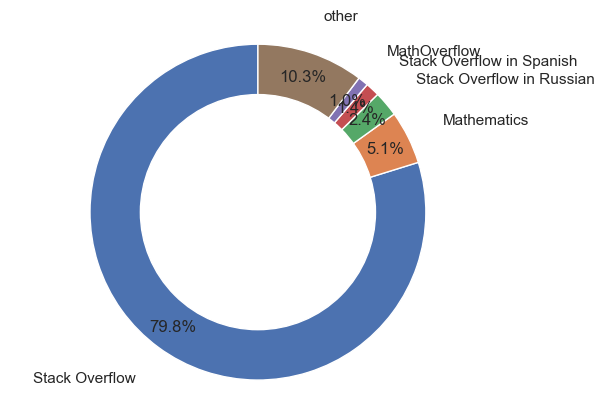

In [53]:
import matplotlib.pyplot as plt

# Calculate the count of observations per each 'Forum'
forum_counts = merged_df_NEW['Forum'].value_counts()

# Get the top 10 forums
top_10_forums = forum_counts[:5]

# Group the rest under 'other'
other_count = forum_counts[5:].sum()
top_10_forums['other'] = other_count

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(top_10_forums, labels=top_10_forums.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, labeldistance=1.23)

# Draw a white circle at the center (to make it a donut chart)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

plt.title('')
plt.show()


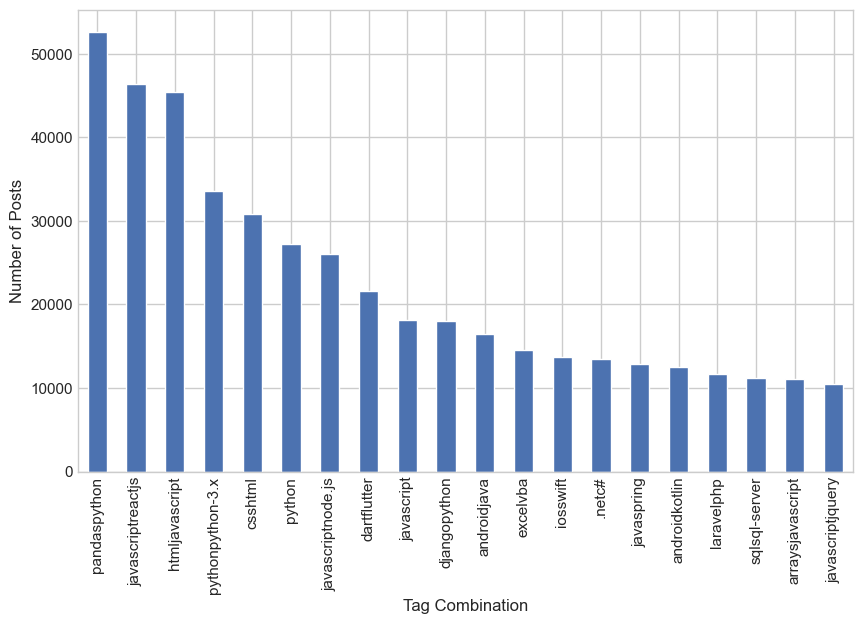

In [55]:
import matplotlib.pyplot as plt

# Count the occurrence of each tag combination
tag_counts = merged_df_NEW['tag_combined'].value_counts()

# Take the top 50 most common tag combinations
top_20_tags = tag_counts[:20]

# Plot histogram
plt.figure(figsize=(10,6))
top_20_tags.plot(kind='bar')
plt.title('')
plt.xlabel('Tag Combination')
plt.ylabel('Number of Posts')
plt.show()

In [37]:
#Show the 5 most popular tag combined
merged_df_NEW['tag_combined'].value_counts().tail(15)

material-designwpf        7
f#type-inference          7
extrudemesh               7
collectionsobjects        7
origintransforms          7
.net-coreoracle           7
autocorrelationr          7
joinruby-on-rails         7
rubocopruby-on-rails      7
windows-task-scheduler    7
fmt                       7
graphqlruby               7
devopspython              7
elasticsearchreindex      7
markdownpython-sphinx     7
Name: tag_combined, dtype: int64

In [38]:
merged_df_NEW.describe()

,Post_View_Count,Post_Score,Post_Answer_Count,Response_Scores,Post_Author,Answer_Author,Week_of_Year,Weekly_Post_Count,D,T,Title_Length,Body_Length,ari,fre,fk_grade,gunning_fog,smog_index,coleman_liau_index,Month_of_Year,Month_Counter
count,2.593153e+06,2.593153e+06,2.593153e+06,2.593153e+06,2.593153e+06,2.593153e+06,2.593153e+06,2.593153e+06,2.593153e+06,2.593153e+06,2.593153e+06,2.593153e+06,2.593153e+06,2.593153e+06,2.593153e+06,2.593153e+06,2.593153e+06,2.593153e+06,2.593153e+06,2.593153e+06
mean,3.510664e+02,5.248302e-01,9.616725e-01,1.068641e+00,9.850203e+06,2.389466e+06,2.800879e+01,6.705505e+04,5.017988e-01,4.669640e-01,6.143171e+01,1.823962e+03,9.853448e+00,7.328344e+01,7.510565e+00,9.563541e+00,7.696757e+00,7.169151e+00,6.883451e+00,2.934200e-01
std,2.247840e+03,2.581520e+00,9.080695e-01,6.894166e+00,7.479898e+06,4.928905e+06,1.626718e+01,1.527340e+04,4.999969e-01,4.989075e-01,2.429523e+01,2.359489e+03,8.089382e+00,3.614047e+01,6.870696e+00,4.800160e+00,4.525574e+00,8.095224e+00,3.745873e+00,2.781936e+00
min,2.000000e+00,-6.540000e+02,0.000000e+00,-1.400000e+01,0.000000e+00,0.000000e+00,1.000000e+00,3.102000e+03,0.000000e+00,0.000000e+00,1.500000e+01,3.800000e+01,-1.160000e+01,-7.238990e+03,-1.570000e+01,0.000000e+00,0.000000e+00,-3.381000e+01,1.000000e+00,-4.000000e+00
25%,4.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.307866e+06,0.000000e+00,1.100000e+01,6.644900e+04,0.000000e+00,0.000000e+00,4.400000e+01,6.680000e+02,6.100000e+00,6.024000e+01,5.700000e+00,7.200000e+00,6.400000e+00,5.680000e+00,3.000000e+00,-2.000000e+00
50%,9.400000e+01,0.000000e+00,1.000000e+00,0.000000e+00,1.067234e+07,0.000000e+00,3.200000e+01,7.164700e+04,1.000000e+00,0.000000e+00,5.700000e+01,1.173000e+03,8.700000e+00,7.033000e+01,7.600000e+00,9.100000e+00,8.800000e+00,7.460000e+00,8.000000e+00,0.000000e+00
75%,2.660000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.687492e+07,1.144035e+06,4.200000e+01,7.321500e+04,1.000000e+00,1.000000e+00,7.400000e+01,2.085000e+03,1.200000e+01,7.940000e+01,9.900000e+00,1.133000e+01,1.070000e+01,9.390000e+00,1.000000e+01,3.000000e+00
max,1.539162e+06,1.442000e+03,2.170000e+02,4.076000e+03,2.171753e+07,2.182002e+07,5.200000e+01,7.662500e+04,1.000000e+00,1.000000e+00,1.500000e+02,1.159190e+05,3.200700e+03,2.068400e+02,1.023200e+03,7.604000e+02,6.380000e+01,3.742000e+03,1.200000e+01,5.000000e+00


In [46]:
df_desc_merged = merged_df_NEW.describe()
df_desc_merged.to_excel("desc_not_agg.xlsx")

In [39]:
grouped_df_tag_reduced_week_NEW = merged_df_NEW.groupby(['tag_combined', merged_df_NEW['Post_Creation_Date'].dt.to_period('W')]).agg(
    Post_Count=('Post_Creation_Date', 'count'),
    Post_Answer_Count=('Post_Answer_Count', 'sum'),
    ari = ('ari', 'mean'),
    fre = ('fre', 'mean'),
    fk_grade = ('fk_grade', 'mean'),
    gunning_fog = ('gunning_fog', 'mean'),
    D = ('D', 'mean'),
    T = ('T', 'mean'),
    smog_index = ('smog_index', 'mean'),
    coleman_liau_index = ('coleman_liau_index', 'mean'),
    Week_of_Year=('Post_Creation_Date', lambda x: x.dt.isocalendar().week.min()),
    Post_View_Count=('Post_View_Count', 'sum'),
    Post_Score=('Post_Score', 'sum'),
    Response_Scores=('Response_Scores', 'sum'),
    Post_Author=('Post_Author', 'nunique'),
    Answer_Author=('Answer_Author', 'nunique'),
    Title_Length = ('Title_Length', 'mean'),
    Body_Length=('Body_Length', 'mean')
).reset_index()

In [40]:
grouped_df_tag_reduced_week_NEW

,tag_combined,Post_Creation_Date,Post_Count,Post_Answer_Count,ari,fre,fk_grade,gunning_fog,D,T,smog_index,coleman_liau_index,Week_of_Year,Post_View_Count,Post_Score,Response_Scores,Post_Author,Answer_Author,Title_Length,Body_Length
0,.d.tstypescript,2021-07-26/2021-08-01,1,2,6.1,78.96,4.6,4.34,0.0,0.0,6.2,7.16,30,161,0,0,1,1,22.0,1152.0
1,.d.tstypescript,2021-08-09/2021-08-15,1,2,12.2,65.46,9.7,12.23,0.0,0.0,11.2,9.75,32,7671,11,14,1,1,34.0,850.0
2,.d.tstypescript,2021-08-23/2021-08-29,1,1,11.9,62.92,10.7,11.40,0.0,0.0,10.3,7.55,34,899,1,0,1,1,71.0,2336.0
3,.d.tstypescript,2022-01-24/2022-01-30,1,0,9.8,63.70,8.4,11.40,0.0,1.0,12.5,10.09,4,42,1,0,1,1,30.0,839.0
4,.d.tstypescript,2022-02-07/2022-02-13,1,0,3.9,90.46,2.2,2.52,0.0,1.0,6.0,5.45,6,1090,2,0,1,1,48.0,438.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781816,сеть,2022-01-31/2022-02-06,1,1,0.0,206.84,-15.7,0.00,0.0,1.0,0.0,-15.81,5,29,0,1,1,1,55.0,562.0
781817,сеть,2022-03-21/2022-03-27,1,0,0.0,206.84,-15.7,0.00,0.0,1.0,0.0,-15.81,12,17,0,0,1,1,38.0,551.0
781818,сеть,2022-08-08/2022-08-14,1,1,0.0,206.84,-15.7,0.00,1.0,0.0,0.0,-15.81,32,30,2,4,1,1,83.0,193.0
781819,сеть,2022-08-29/2022-09-04,1,0,0.0,206.84,-15.7,0.00,1.0,0.0,0.0,-15.81,35,27,0,0,1,1,26.0,2076.0


In [41]:
grouped_df_tag_reduced_week_NEW.describe()

,Post_Count,Post_Answer_Count,ari,fre,fk_grade,gunning_fog,D,T,smog_index,coleman_liau_index,Week_of_Year,Post_View_Count,Post_Score,Response_Scores,Post_Author,Answer_Author,Title_Length,Body_Length
count,781821.000000,781821.000000,781821.000000,781821.000000,781821.000000,781821.000000,781821.000000,781821.000000,781821.000000,781821.000000,781821.000000,7.818210e+05,781821.000000,781821.000000,781821.000000,781821.000000,781821.000000,781821.000000
mean,3.316812,3.189687,10.142723,70.695801,7.808621,9.634146,0.514476,0.482273,8.198190,7.801096,27.692659,1.164421e+03,1.740763,3.544481,3.115883,1.826299,61.236932,1667.524171
std,15.785401,18.302068,6.873068,28.996033,5.449808,3.821009,0.499791,0.498282,3.912263,6.883033,16.379036,8.226377e+03,8.720423,20.573030,14.051442,4.901303,21.432817,1932.680979
min,1.000000,0.000000,-11.600000,-2371.076667,-15.700000,0.000000,0.000000,0.000000,0.000000,-33.810000,1.000000,2.000000e+00,-647.000000,-14.000000,1.000000,1.000000,15.000000,38.000000
25%,1.000000,1.000000,7.000000,60.140000,6.200000,7.730000,0.000000,0.000000,6.690625,6.233333,11.000000,6.800000e+01,0.000000,0.000000,1.000000,1.000000,47.000000,699.666667
50%,1.000000,1.000000,9.200000,68.963333,7.900000,9.337500,1.000000,0.000000,9.050000,7.830000,32.000000,1.850000e+02,0.000000,1.000000,1.000000,1.000000,58.500000,1187.000000
75%,2.000000,2.000000,12.000000,76.945000,9.800000,11.150000,1.000000,1.000000,10.700000,9.630000,42.000000,5.900000e+02,2.000000,2.000000,2.000000,2.000000,72.000000,1958.000000
max,790.000000,1010.000000,1670.300000,206.840000,346.833333,260.973333,1.000000,1.000000,43.100000,2044.390000,52.000000,1.690099e+06,1537.000000,4108.000000,652.000000,241.000000,150.000000,108971.000000


In [42]:
#Save grouped_df_tag_reduced as csv
grouped_df_tag_reduced_week_NEW.to_csv('Master Thesis Data\\grouped_df_tag_reduced_week_NEW_2.csv', index=False)